In [1]:
from fastai.vision import *
from posthocos.dataset import get_brats3d_regression, add_test_set
from posthocos.model import sigmix_learner

# Load data

In [2]:
bs = 8
data = get_brats3d_regression(path='data/preprocess/train', bs=bs)

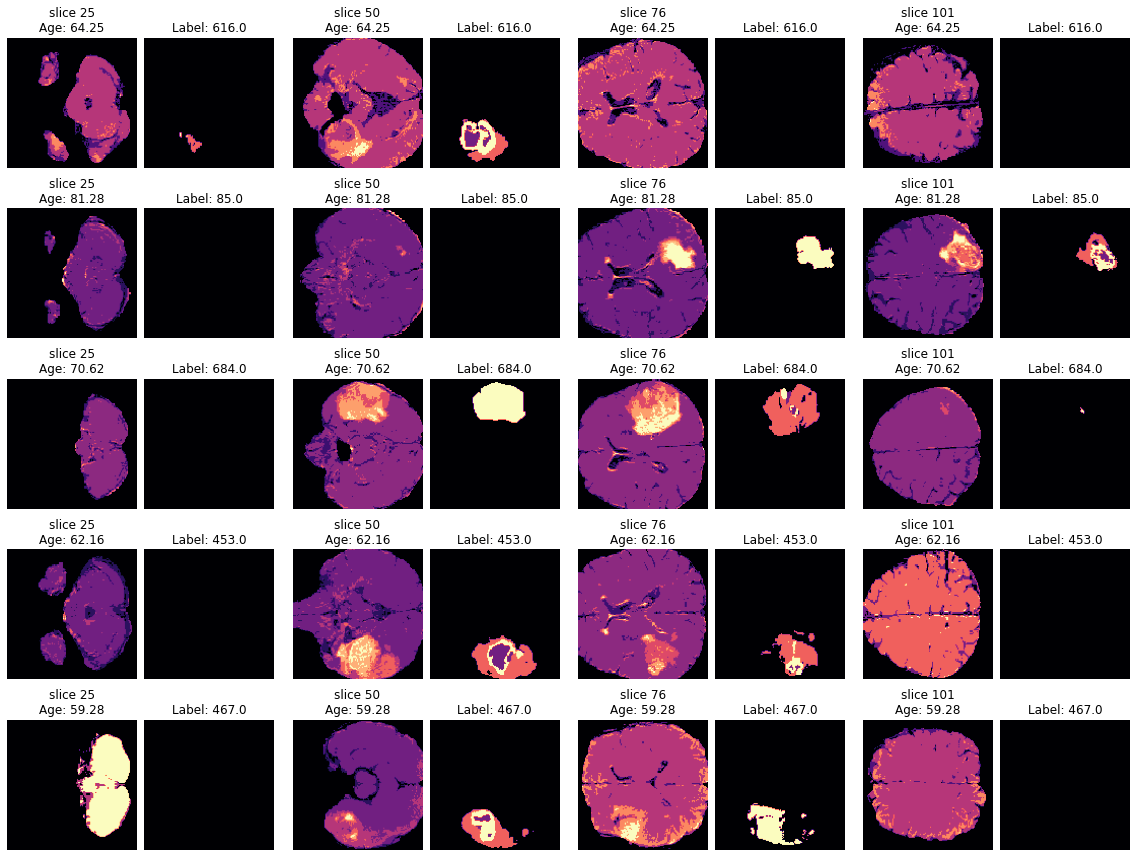

In [3]:
data.show_batch()

# Load model

In [4]:
learn = sigmix_learner(data, path='example')
learn.load('trained_model');

In [5]:
learn.model.bin_weights

tensor([577.4000, 304.4000, 304.4000, 304.4000, 309.4000], device='cuda:0')

In [6]:
results = {a.__name__:b.item() for a,b in zip(learn.metrics, learn.validate()[1:])}
results

{'mae': 239.06982421875, 'acc': 0.5476190476190477}

# Predict validation set

In [7]:
add_test_set(data, '/home/renato/data/brats2019/preprocess/validation_nocrop/');
mean_age = data.train_ds.metadata.Age.mean()
data.test_ds.metadata.Age.fillna(mean_age, inplace=True)

In [9]:
test_preds = []
for xb,yb in progress_bar(data.test_dl):
    with torch.no_grad(): yb_ = learn.model.eval()(*xb)
    test_preds.append(yb_.cpu())
    
test_preds = torch.cat(test_preds)
test_preds.shape

torch.Size([125])

In [10]:
res = data.test_ds.metadata.iloc[data.test_ds.items][['subject']].copy().reset_index(drop=True)
res['Surv'] = test_preds
res.head()

,subject,Surv
0,BraTS19_TCIA03_216_1,610.915527
1,BraTS19_MDA_959_1,548.742676
2,BraTS19_UAB_3498_1,382.140625
3,BraTS19_WashU_W053_1,593.621460
4,BraTS19_MDA_907_1,475.994995


# ---